# Ratings Prediction Project

#### Problem Statement

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

In [ ]:
!pip install wordcloud

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_rp = pd.read_csv("Ratings_Prediction.csv")
df_rp

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Really Nice,"Actually, I felt like this infinix brand is no...",4
1,1,Wonderful,Laptop is nice but after sometimes heating sta...,4
2,2,Great product,"brilliant design, so sleek and beautiful. stil...",5
3,3,Simply awesome,Everything excellent in price point,5
4,4,Awesome,Mind blowing purchase ever.. very nice perform...,5
...,...,...,...,...
47351,47351,Very bad body gaje,Big lens is worst product body gaje poor,2.0 out of 5 stars
47352,47352,For bigginers ok,Average performance..,2.0 out of 5 stars
47353,47353,I hate it's auto focus,I am hate this camera because of it's more blu...,2.0 out of 5 stars
47354,47354,No Have Warranty Details,No Have Warranty Details,2.0 out of 5 stars


I have imported the collected data which was in csv format and stored it as a dataframe. We can see the first 5 and last 5 observations of the dataset and it looks good also we have all string valued columns. 

In this particular dataset we have about `47356 rows and 3 columns`.

`Unnamed: 0` is the index column of csv file so let's drop that column. Since Ratings is my target column and it is a categorical column with 5 categories so this problem is a `Multi Classification Problem`.

### **Feature Information**: 

**Review_Title** : Title of the Review.  
**Review_Text** : Text Content of the Review.  
**Ratings** : Ratings out of 5 stars.

In [3]:
# First 10 rows
df_rp.head(10)

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Really Nice,"Actually, I felt like this infinix brand is no...",4
1,1,Wonderful,Laptop is nice but after sometimes heating sta...,4
2,2,Great product,"brilliant design, so sleek and beautiful. stil...",5
3,3,Simply awesome,Everything excellent in price point,5
4,4,Awesome,Mind blowing purchase ever.. very nice perform...,5
5,5,Best in the market!,Rating given based on features given at this p...,5
6,6,Worth every penny,Only One Laptop In India Who Can Provide All T...,5
7,7,Delightful,Great by the price ❤❤,4
8,8,Just wow!,Very nice product value for money 💰💰,5
9,9,Fabulous!,Highly recommended go for it.,5


In [4]:
# Last 10 rows
df_rp.tail(10)

,Unnamed: 0,Review_Title,Review_Text,Ratings
47346,47346,Warranty issues,This Product have no warranty ....a big proble...,2.0 out of 5 stars
47347,47347,Bad experience bcz memory card is missing,It was good but I don't received memory card.....,2.0 out of 5 stars
47348,47348,Totally disappointed with camera canon 1500d,Not reached to expected level and I was totall...,2.0 out of 5 stars
47349,47349,No blurriness in background,There is no blur in the background and many th...,2.0 out of 5 stars
47350,47350,EOS 1500 D Canon,Canon Camera not recording video for more than...,2.0 out of 5 stars
47351,47351,Very bad body gaje,Big lens is worst product body gaje poor,2.0 out of 5 stars
47352,47352,For bigginers ok,Average performance..,2.0 out of 5 stars
47353,47353,I hate it's auto focus,I am hate this camera because of it's more blu...,2.0 out of 5 stars
47354,47354,No Have Warranty Details,No Have Warranty Details,2.0 out of 5 stars
47355,47355,NaN,NaN,NaN


In [5]:
# Sample
df_rp.sample(4)

,Unnamed: 0,Review_Title,Review_Text,Ratings
36889,36889,Refund problem,I want to refund this item cause is not workin...,1.0 out of 5 stars
20965,20965,Simply awesome,Thank you Dizo very very nice watch nice displ...,5
37436,37436,Worst earphone,It is dead within one month of use ... Add som...,1.0 out of 5 stars
6522,6522,Pretty good,Looking tyt,4


# Exploratory Data Analysis [EDA]

Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [6]:
# Dropping unnecessary column
df_rp.drop(columns = 'Unnamed: 0',inplace = True)

In [7]:
# Checking shape of my dataset
df_rp.shape

(47356, 3)

There are `21661 rows and 3 columns` in the dataset.

In [8]:
# Checking all column names
df_rp.columns

Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')

In [9]:
# Checking the info about the dataset
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47356 entries, 0 to 47355
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  44071 non-null  object
 1   Review_Text   44520 non-null  object
 2   Ratings       44071 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [10]:
# Checking null values in the dataset
df_rp.isnull().sum()

Review_Title    3285
Review_Text     2836
Ratings         3285
dtype: int64

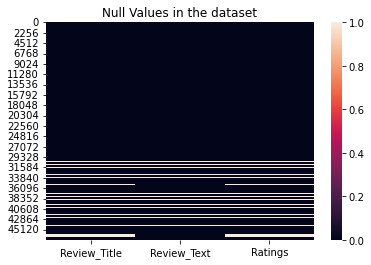

In [11]:
# Visualizing null values in the dataset
sns.heatmap(df_rp.isnull())
plt.title("Null Values in the dataset")
plt.show()

We have a huge number of nan values in the dataset. Let's replace them using imputation methods.

# Replacing NaN values using imputation methods

In [12]:
# Checking the mode of Review_Title column
df_rp["Review_Title"].mode()

0    Wonderful
dtype: object

The highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [13]:
# Checking the mode of Review_Text column
df_rp["Review_Text"].mode()

0    Good
dtype: object

The highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.

In [14]:
# Checking the value counts of Ratings column
df_rp.Ratings.value_counts()

5                     18512
4                      5915
5.0 out of 5 stars     3200
1                      2961
4.0 out of 5 stars     2865
1.0 out of 5 stars     2853
2.0 out of 5 stars     2642
3.0 out of 5 stars     2633
3                      1759
2                       731
Name: Ratings, dtype: int64

Since the highest count in Ratings column is 5, followed by 5.0 out of 5 stars and they both are same, so it is clear the mode for Ratings column is 5.

In [15]:
# Checking the mode of Ratings column
df_rp["Ratings"].mode()

0    5
dtype: object

In [16]:
# Replacing nan values with there mode as all the columns are categorical.
df_rp["Review_Title"] = df_rp["Review_Title"].fillna(df_rp["Review_Title"].mode()[0])
df_rp["Review_Text"] = df_rp["Review_Text"].fillna(df_rp["Review_Text"].mode()[0])
df_rp["Ratings"] = df_rp["Ratings"].fillna(df_rp["Ratings"].mode()[0])

In [17]:
# Checking null values in the dataset again
df_rp.isnull().sum()

Review_Title    0
Review_Text     0
Ratings         0
dtype: int64

We have sucessfully replaced all the nan values using imputation method.

**Now lets make some changes to our target column to make it easier for model building.**

In [18]:
# Checking the unique value count of target column
df_rp['Ratings'].unique()

array(['4', '5', '3', '1', '2', '2.0 out of 5 stars',
       '3.0 out of 5 stars', '1.0 out of 5 stars', '5.0 out of 5 stars',
       '4.0 out of 5 stars'], dtype=object)

Looking the above entries in target column, we need to replace the string entries to there respective values. And lastly, change the column type to integer.

In [19]:
# Replacing the string entries in target column
df_rp['Ratings'] = df_rp['Ratings'].replace('1.0 out of 5 stars',1)
df_rp['Ratings'] = df_rp['Ratings'].replace('2.0 out of 5 stars',2)
df_rp['Ratings'] = df_rp['Ratings'].replace('3.0 out of 5 stars',3)
df_rp['Ratings'] = df_rp['Ratings'].replace('4.0 out of 5 stars',4)
df_rp['Ratings'] = df_rp['Ratings'].replace('5.0 out of 5 stars',5)

In [20]:
# Changing the column data type
df_rp['Ratings'] = df_rp['Ratings'].astype('int')

In [21]:
# Checking the unique value count of target column again
df_rp['Ratings'].unique()

array([4, 5, 3, 1, 2])

**Now lets combine Review_Title and Review_Text to make a single column `Review`.**

In [22]:
# Combining Review text and title
df_rp['Review'] = df_rp['Review_Title'].map(str)+' '+df_rp['Review_Text']

In [23]:
# let's have a look into our dataset
df_rp

,Review_Title,Review_Text,Ratings,Review
0,Really Nice,"Actually, I felt like this infinix brand is no...",4,"Really Nice Actually, I felt like this infinix..."
1,Wonderful,Laptop is nice but after sometimes heating sta...,4,Wonderful Laptop is nice but after sometimes h...
2,Great product,"brilliant design, so sleek and beautiful. stil...",5,"Great product brilliant design, so sleek and b..."
3,Simply awesome,Everything excellent in price point,5,Simply awesome Everything excellent in price p...
4,Awesome,Mind blowing purchase ever.. very nice perform...,5,Awesome Mind blowing purchase ever.. very nice...
...,...,...,...,...
47351,Very bad body gaje,Big lens is worst product body gaje poor,2,Very bad body gaje Big lens is worst product b...
47352,For bigginers ok,Average performance..,2,For bigginers ok Average performance..
47353,I hate it's auto focus,I am hate this camera because of it's more blu...,2,I hate it's auto focus I am hate this camera b...
47354,No Have Warranty Details,No Have Warranty Details,2,No Have Warranty Details No Have Warranty Details


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title & Review_Text.

In [24]:
# Dropping unnecessary columns
df_rp.drop(columns = 'Review_Title',inplace = True)
df_rp.drop(columns = 'Review_Text',inplace = True)

In [25]:
# Checking data of first row in Review column
df_rp['Review'][0]

'Really Nice Actually, I felt like this infinix brand is not much popular . But guys believe it satisfies you 100% . You get free trail of 1 month ms office . Only con is getting heat instantly\nYou feel very hot while using laptop apart from that this is an wonderful laptop .'

In [26]:
# Checking data of second row in Review column
df_rp['Review'][1]

'Wonderful Laptop is nice but after sometimes heating started.Performance wise it is good .Charger adaptor is very big which is not suitable on many switch board it should be normal..and screen is very good..look wise it is also very nice.but company should provide ms office which is required for office work'

By observing the Reviews we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do some text processing.

# Text Processing

In [27]:
# Importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

In [28]:
# Here I am defining a function to replace some of the contracted words to their full form and removing urls 
# and unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [29]:
# Changing all words to there Lowercase
df_rp['Review'] = df_rp['Review'].apply(lambda x : x.lower())

df_rp['Review'] = df_rp['Review'].apply(lambda x : decontracted(x))

In [30]:
# Removing punctuations
df_rp['Review'] = df_rp['Review'].str.replace('[^\w\s]','')
df_rp['Review'] = df_rp['Review'].str.replace('\n',' ')

In [31]:
# Checking data of first row in Review column again
df_rp['Review'][0]

'really nice actually i felt like this infinix brand is not much popular  but guys believe it satisfies you 100  you get free trail of 1 month ms office  only con is getting heat instantly you feel very hot while using laptop apart from that this is an wonderful laptop '

In [32]:
# Checking data of second row in Review column again
df_rp['Review'][1]

'wonderful laptop is nice but after sometimes heating startedperformance wise it is good charger adaptor is very big which is not suitable on many switch board it should be normaland screen is very goodlook wise it is also very nicebut company should provide ms office which is required for office work'

Now the data looks far better than previous.And we have successfully removed punctuations and unwanted text from our text and lowercased all the text data.

# Removing Stop Words

In [33]:
# Removing stop words
stop = stopwords.words('english')
df_rp['Review'] = df_rp['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
# Checking the text data again
df_rp['Review'][0]

'really nice actually felt like infinix brand much popular guys believe satisfies 100 get free trail 1 month ms office con getting heat instantly feel hot using laptop apart wonderful laptop'

In [35]:
# Checking the text data again
df_rp['Review'][1]

'wonderful laptop nice sometimes heating startedperformance wise good charger adaptor big suitable many switch board normaland screen goodlook wise also nicebut company provide ms office required office work'

Now we have removed all stop words from the text data.

# Lemmatization

In [36]:
# Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [37]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [38]:
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # Tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
df_rp['Review'] = df_rp['Review'].apply(lambda x : lemmatize_sentence(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anup.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anup.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
# Checking the text data again
df_rp['Review'][0]

'really nice actually felt like infinix brand much popular guy believe satisfy 100 get free trail 1 month m office con get heat instantly feel hot use laptop apart wonderful laptop'

In [41]:
# Checking the text data again
df_rp['Review'][1]

'wonderful laptop nice sometimes heat startedperformance wise good charger adaptor big suitable many switch board normaland screen goodlook wise also nicebut company provide ms office require office work'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.

# Text Normalization - Standardization

In [42]:
# Noise removal
def scrub_words(text):
    # Remove html markup
    text = re.sub("(<.*?>)", "", text)
    # Remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # Remove white space
    text = text.strip()
    return text

I have defined a function scrub_words for removing the noise from the text. It will remove any html markups, digits and white spaces from the text.

In [43]:
df_rp['Review'] = df_rp['Review'].apply(lambda x : scrub_words(x))

In [44]:
# Checking the text data again
df_rp['Review'][0]

'really nice actually felt like infinix brand much popular guy believe satisfy  get free trail  month m office con get heat instantly feel hot use laptop apart wonderful laptop'

In [45]:
# Checking the text data again
df_rp['Review'][1]

'wonderful laptop nice sometimes heat startedperformance wise good charger adaptor big suitable many switch board normaland screen goodlook wise also nicebut company provide ms office require office work'

Now we have done all the text-processing steps and got required input for our model.

# Data Visualization

### i) Word Counts:

In [46]:
# Creating column for word counts in the text
df_rp['Review_WordCount'] = df_rp['Review'].apply(lambda x: len(str(x).split(' ')))
df_rp[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,31,really nice actually felt like infinix brand m...
1,28,wonderful laptop nice sometimes heat startedpe...
2,32,great product brilliant design sleek beautiful...
3,6,simply awesome everything excellent price point
4,8,awesome mind blow purchase ever nice performan...


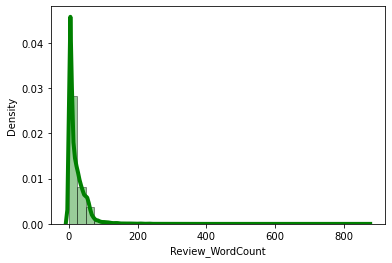

In [47]:
# Density plot and Histogram of Review Word Count
sns.distplot(df_rp['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'g',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having a word count in the range of 0 to 200. But some of the reviews are too lengthy which may act like outliers in our data.

### ii) Character Counts:

In [48]:
# Creating column for character counts in the text
df_rp['Review_CharCount'] = df_rp['Review'].str.len()
df_rp[['Review_CharCount','Review']].head()

,Review_CharCount,Review
0,175,really nice actually felt like infinix brand m...
1,202,wonderful laptop nice sometimes heat startedpe...
2,194,great product brilliant design sleek beautiful...
3,47,simply awesome everything excellent price point
4,56,awesome mind blow purchase ever nice performan...


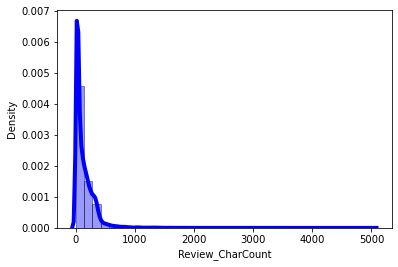

In [49]:
# Density plot and Histogram of all Character Counts
sns.distplot(df_rp['Review_CharCount'], hist = True, kde = True,
            bins = int(180/5), color = 'blue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

The above plot represents histogram for character counts of Review text, which is quite similar to the histogram of word count. Most of the characters are between 0 - 1000.

### Removing Outliers

Some of the reviews are too lengthy, so we have to treat them as outliers and remove them using z_score method.

In [50]:
# Checking the shape of the dataset
df_rp.shape

(47356, 4)

In [51]:
from scipy import stats
from scipy.stats import zscore

z_score = zscore(df_rp[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df_rp = df_rp[filtering_entry]
df_rp.shape

(46578, 4)

In [52]:
Data_loss=((21661-21313)/21661)*100
Data_loss

1.6065740270532294

The data loss after removing outliers is 1.60 %, which is in acceptable range.

### Plotting histograms for word counts and character counts again after removing outliers

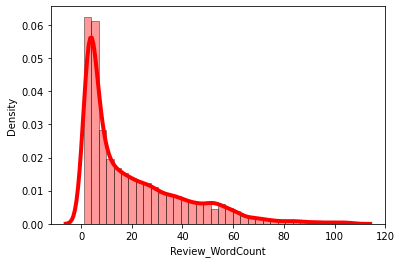

In [53]:
# Density plot and Histogram of Review Word Count
sns.distplot(df_rp['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'r',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

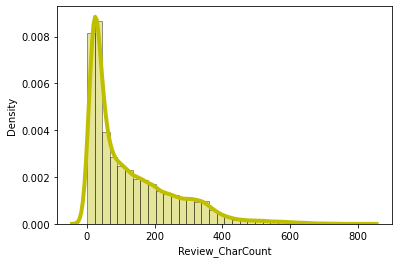

In [54]:
# Density plot and Histogram of all Character Counts
sns.distplot(df_rp['Review_CharCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

### iii) Top 25 most frequently occuring words:

In [55]:
# Function to plot most frequent terms
def freq_words(x, terms = 25):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # Selecting top 25 most frequent words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (16,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

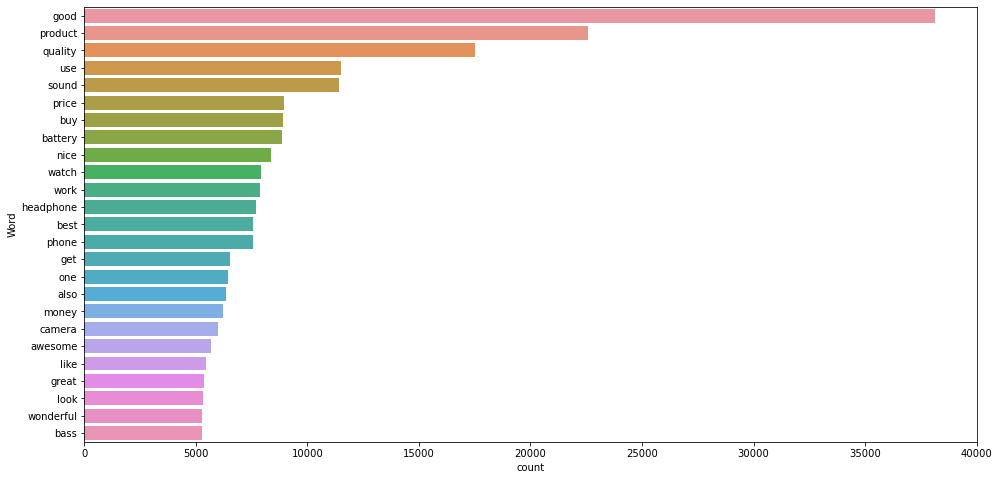

In [56]:
freq_words(df_rp['Review'])

Above list of words have a frequent occurence. Mainly, good, product & quality.

### iv) Top 25 rarely occuring words:

In [57]:
# Function to plot least frequent terms
def rare_words(x, terms = 25):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # Selecting top 25 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (16,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

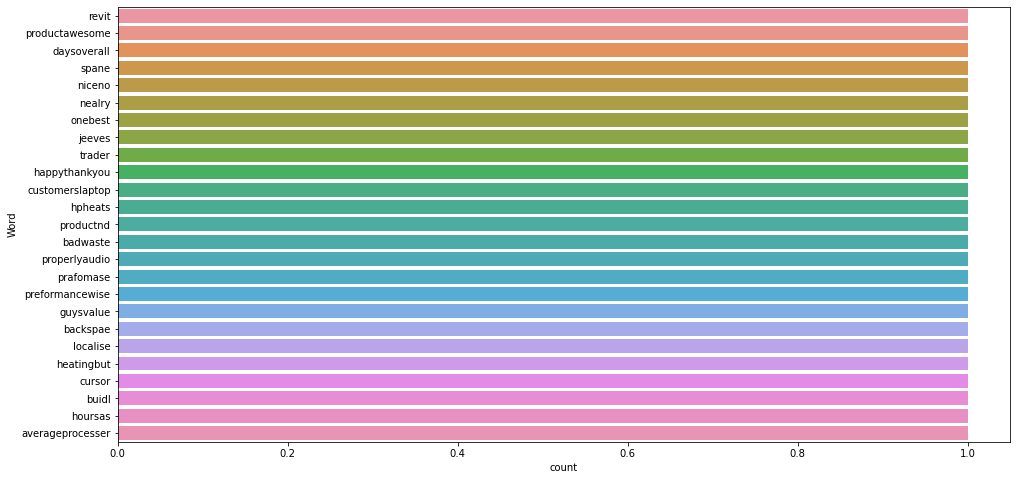

In [58]:
rare_words(df_rp['Review'])

Above list of words have rare occurance in Review.

### v) Word cloud:

In [59]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [60]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

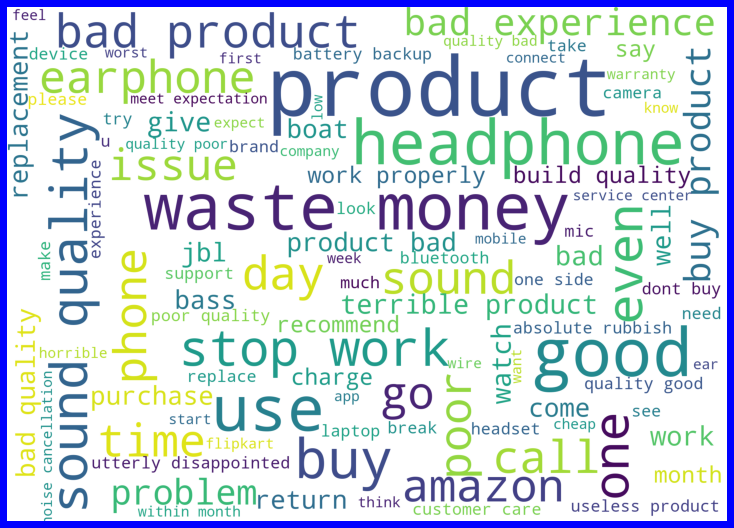

In [61]:
# Plot the loud words with Rating 1
from wordcloud import WordCloud

df_r1=df_rp['Review'][df_rp['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

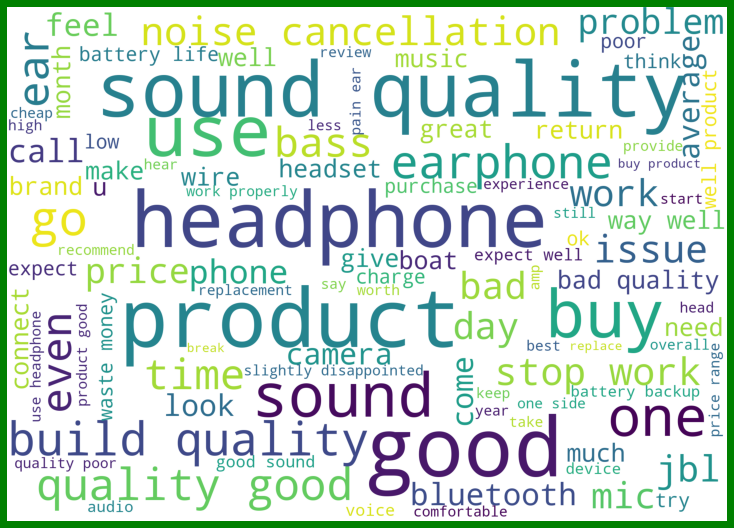

In [62]:
# Plot the loud words with Rating 2
from wordcloud import WordCloud

df_r2=df_rp['Review'][df_rp['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r2))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

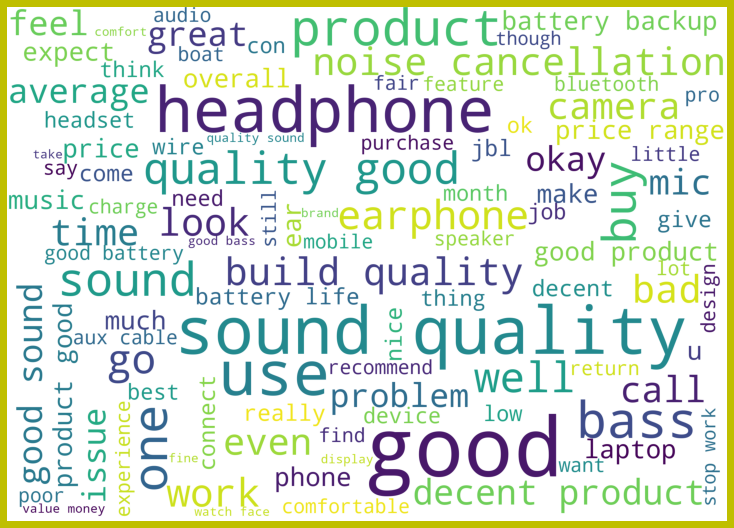

In [63]:
# Plot the loud words with Rating 3
from wordcloud import WordCloud

df_r3=df_rp['Review'][df_rp['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r3))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

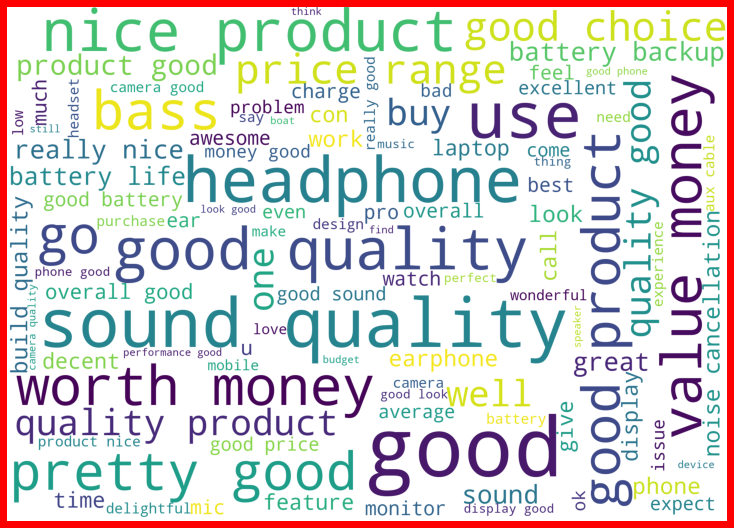

In [64]:
# Plot the loud words with Rating 4
from wordcloud import WordCloud

df_r4=df_rp['Review'][df_rp['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

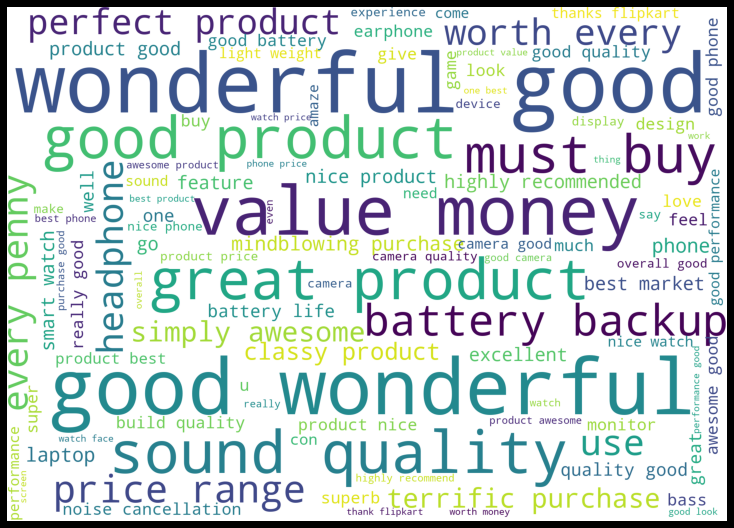

In [65]:
# Plot the loud words with Rating 5
from wordcloud import WordCloud

df_r5=df_rp['Review'][df_rp['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r5))

plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.  

The most frequent words used for each Rating is displayed in the word cloud.

In [66]:
# Checking the value counts of Ratings column
df_rp.Ratings.value_counts()

5    24661
4     8559
1     5740
3     4310
2     3308
Name: Ratings, dtype: int64

# Model Building

In [67]:
# Separating feature and target
x = df_rp['Review']
y = df_rp['Ratings']

### Converting text data into vectors using Tfidf Vectorizer

In [68]:
# Using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 17000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [69]:
# Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 8000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [70]:
# Combining both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

In [71]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [72]:
x_train.shape

(34933, 25000)

In [73]:
x_test.shape

(11645, 25000)

In [74]:
y_train.shape

(34933,)

In [75]:
y_test.shape

(11645,)

# SMOTE

Now let's do oversampling in order to make data balanced.

In [76]:
# Checking the value counts of Ratings column
y.value_counts()

5    24661
4     8559
1     5740
3     4310
2     3308
Name: Ratings, dtype: int64

In [77]:
# Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 18485, 4: 6423, 1: 4340, 3: 3213, 2: 2472})


So we have maximum count 8123 for 5 rating, so we will over sample mannually all the ratings to the mark 8123.

In [78]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Transforming the dataset
sm = SMOTE(sampling_strategy = {1: 18485, 2: 18485, 3: 18485, 4: 18485, 5: 18485})
x_train1,y_train1 = sm.fit_resample(x_train,y_train)

print("The number of classes after fit {}".format(Counter(y_train1)))

The number of classes after fit Counter({1: 18485, 5: 18485, 2: 18485, 4: 18485, 3: 18485})


<AxesSubplot:xlabel='Ratings', ylabel='count'>

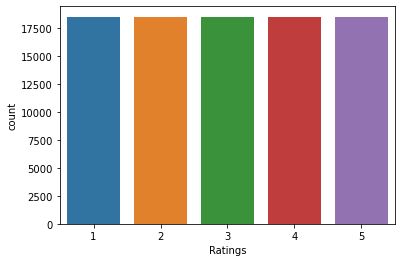

In [79]:
# Visualizing the data after oversampling
sns.countplot(y_train1)

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
lg=LogisticRegression()
lg.fit(x_train1, y_train1)
lg.score(x_train1, y_train1)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.8506655216831258
[[1163  142   71   12   12]
 [ 138  538  117   29   14]
 [  45  153  732  137   30]
 [  17   69  156 1755  139]
 [  23   34  102  299 5718]]
              precision    recall  f1-score   support

           1       0.84      0.83      0.83      1400
           2       0.57      0.64      0.61       836
           3       0.62      0.67      0.64      1097
           4       0.79      0.82      0.80      2136
           5       0.97      0.93      0.95      6176

    accuracy                           0.85     11645
   macro avg       0.76      0.78      0.77     11645
weighted avg       0.86      0.85      0.85     11645



# Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
dtc.score(x_train1,y_train1)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.8087591240875912
[[1060  143   94   46   57]
 [ 154  461   88   56   77]
 [  88  134  647  117  111]
 [  63  102  124 1648  199]
 [  73   80  164  257 5602]]
              precision    recall  f1-score   support

           1       0.74      0.76      0.75      1400
           2       0.50      0.55      0.53       836
           3       0.58      0.59      0.58      1097
           4       0.78      0.77      0.77      2136
           5       0.93      0.91      0.92      6176

    accuracy                           0.81     11645
   macro avg       0.70      0.72      0.71     11645
weighted avg       0.81      0.81      0.81     11645



# Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc=RandomForestClassifier()
rfc.fit(x_train1,y_train1)
rfc.score(x_train1,y_train1)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8519536281665951
[[1196  131   46   11   16]
 [ 181  516   77   28   34]
 [  75  168  683  111   60]
 [  28   94  136 1732  146]
 [  33   53   81  215 5794]]
              precision    recall  f1-score   support

           1       0.79      0.85      0.82      1400
           2       0.54      0.62      0.57       836
           3       0.67      0.62      0.64      1097
           4       0.83      0.81      0.82      2136
           5       0.96      0.94      0.95      6176

    accuracy                           0.85     11645
   macro avg       0.76      0.77      0.76     11645
weighted avg       0.86      0.85      0.85     11645



# Cross Validation Score

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
scr_lg=cross_val_score(lg,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.787083525489136


In [88]:
scr_dtc=cross_val_score(dtc,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.704791613226035


In [89]:
scr_rfc=cross_val_score(rfc,train_features,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.7745029635207046


From the above Cross Validation Scores, the highest score belongs to Logistic Regression Model. Followed by the SVC Model.

Next the Random Forest Classifier model.

Lastly, the Decision Tree Classifier model.

# Hyper Parameter Tuning

Since the Accuracy Score and the Crosss Validation Score of the Logistic Regression Model have the least different between them, we shalll consider it for hyper parameter tuning.

We shall use GridSearchCV for hyper parameter tuning.

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
parameters={
    'C': [0.5,1.0],
    'penalty': ['l1', 'l2'],
    'solver':['newton-cg','lbfgs']}
grid_lg = GridSearchCV(lg, param_grid = parameters, cv = 4)

In [94]:
grid_lg.fit(x_train1, y_train1)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']})

In [95]:
grid_lg.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [96]:
Final_Model= LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')

Final_Model.fit(x_train1,y_train1)
pred = Final_Model.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:  0.8183769858308286
[[1126  192   60   11   11]
 [ 120  555  121   28   12]
 [  49  224  673  131   20]
 [  21  112  208 1640  155]
 [  29   63  144  404 5536]]
              precision    recall  f1-score   support

           1       0.84      0.80      0.82      1400
           2       0.48      0.66      0.56       836
           3       0.56      0.61      0.58      1097
           4       0.74      0.77      0.75      2136
           5       0.97      0.90      0.93      6176

    accuracy                           0.82     11645
   macro avg       0.72      0.75      0.73     11645
weighted avg       0.84      0.82      0.83     11645



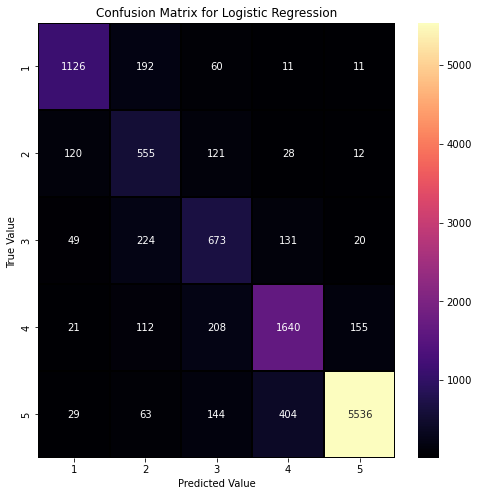

In [97]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["1","2","3","4","5"]
y_axis_labels = ["1","2","3","4","5"]

f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="magma",xticklabels = x_axis_labels,yticklabels = y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Saving the Model

Logistic Regression Model is our best model with accuracy of 83.16 %.

In [98]:
import joblib
joblib.dump(Final_Model,"Ratings_Prediction_Project.pkl")

['Ratings_Prediction_Project.pkl']

# Prediction

In [99]:
# Loading the saved model
ratings_prediction_model=joblib.load("Ratings_Prediction_Project.pkl")

# Prediction
prediction = ratings_prediction_model.predict(x_test)
prediction

array([5, 5, 1, ..., 2, 5, 5])

In [100]:
pd.DataFrame([ratings_prediction_model.predict(x_test)[:],y_test[:]],index=["Predicted Rating","Actual Rating"])

,0,1,2,3,4,5,6,7,8,9,...,11635,11636,11637,11638,11639,11640,11641,11642,11643,11644
Predicted Rating,5,5,1,5,2,5,2,5,5,3,...,5,5,4,4,4,1,2,2,5,5
Actual Rating,5,5,1,5,5,5,2,5,5,3,...,5,5,4,4,4,1,4,2,5,5


The actual and predicted values are almost similar.